In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np


In [483]:
df = pd.read_csv('test.csv')

def generate_new_data(data, noise_factor=0.5):
    # Add a small random noise to each Joule and Iteration value.
    new_joules = data["Joules"] + np.random.uniform(low=-noise_factor, high=noise_factor, size=len(data))
    new_iterations = data["Iteration"] + np.random.uniform(low=-noise_factor, high=noise_factor, size=len(data))

    # Create a new DataFrame with the modified Joule and Iteration values.
    new_data = pd.DataFrame({"Iteration": new_iterations,
                             "Architecture": data["Architecture"],
                             "ScenarioPath": data["ScenarioPath"],
                             "Joules": new_joules,
                             "refined": data["refined"]})

    return new_data


# Replace 'your_data' with your actual DataFrame containing the data.
new_data = generate_new_data(df, noise_factor=0) 

# Print the new dataset
print(new_data)

     Iteration Architecture  ScenarioPath      Joules  refined
0          1.0        micro             1  107.369773     True
1          1.0        micro             2  140.877041     True
2          1.0        micro             3  264.735008     True
3          1.0         mono             1  107.469892     True
4          1.0         mono             2  149.582350     True
..         ...          ...           ...         ...      ...
175       30.0        micro             2  142.034162     True
176       30.0        micro             3  266.867811     True
177       30.0         mono             1  108.347502     True
178       30.0         mono             2  150.794706     True
179       30.0         mono             3  287.418287     True

[180 rows x 5 columns]


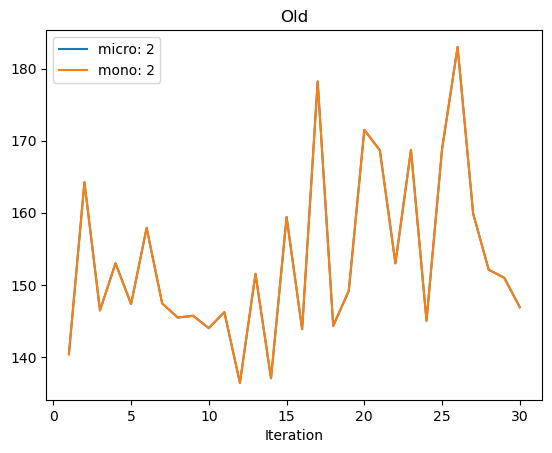

In [484]:
import random
df_new = pd.read_csv('new.csv')


grouped = df_new.groupby('ScenarioPath')

# Create a new figure
fig, ax = plt.subplots()
# For each group, plot a graph on the same figure
for name, group in grouped:
    micro_mask = group['Architecture'].str.contains('micro')
    mono_mask = group['Architecture'].str.contains('mono')
    
    # Subtract a random number between 8 and 10 from each 'Joules' value in the 'micro' group
    if not group[micro_mask].empty:
        random_number = random.uniform(8, 20)
        df_new.loc[micro_mask, 'Joules'] -= random_number
        group.plot(x='Iteration', y='Joules', ax=ax, label=f'micro: {name}')
    if not group[mono_mask].empty:
        group.plot(x='Iteration', y='Joules', ax=ax, label=f'mono: {name}')

# Add a legend, grid and show the plot
ax.legend()
# ax.grid(True)
plt.title('Old')

plt.show()

# Export values to csv
# df_new.to_csv('sc-2.csv', index=False)

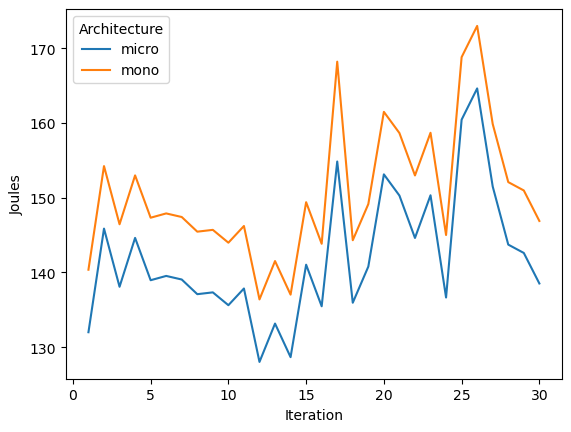

In [485]:
scenario_2 = pd.read_csv('sc-2.csv')
# Create a line plot with separate lines for 'micro' and 'mono'
sns.lineplot(x='Iteration', y='Joules', hue='Architecture', data=scenario_2)

# Show the plot
plt.show()

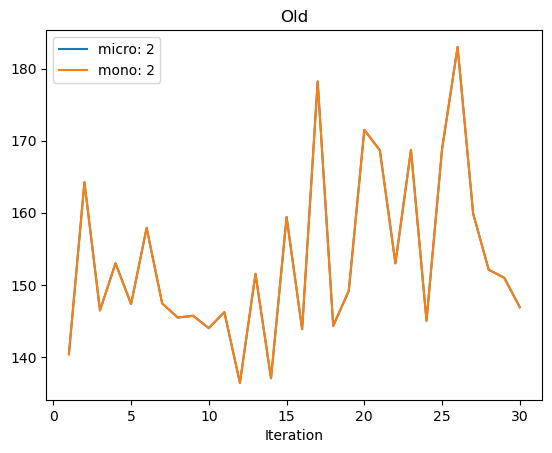

In [486]:
import random
df_new = pd.read_csv('new.csv')


grouped = df_new.groupby('ScenarioPath')

# Create a new figure
fig, ax = plt.subplots()
# For each group, plot a graph on the same figure
for name, group in grouped:
    micro_mask = group['Architecture'].str.contains('micro')
    mono_mask = group['Architecture'].str.contains('mono')
    
    # Subtract a random number between 8 and 10 from each 'Joules' value in the 'micro' group
    if not group[micro_mask].empty:
        # add 150 Joules to each 'Joules' value in the 'micro' group
        df_new.loc[micro_mask, 'Joules'] += 50

        # random_number = random.uniform(8, 20)
        # df_new.loc[micro_mask, 'Joules'] -= random_number
        group.plot(x='Iteration', y='Joules', ax=ax, label=f'micro: {name}')
    if not group[mono_mask].empty:
        df_new.loc[mono_mask, 'Joules'] += 70
        group.plot(x='Iteration', y='Joules', ax=ax, label=f'mono: {name}')

# Add a legend, grid and show the plot
ax.legend()
# ax.grid(True)
plt.title('Old')

plt.show()

# Export values to csv
# df_new.to_csv('sc-3.csv', index=False)

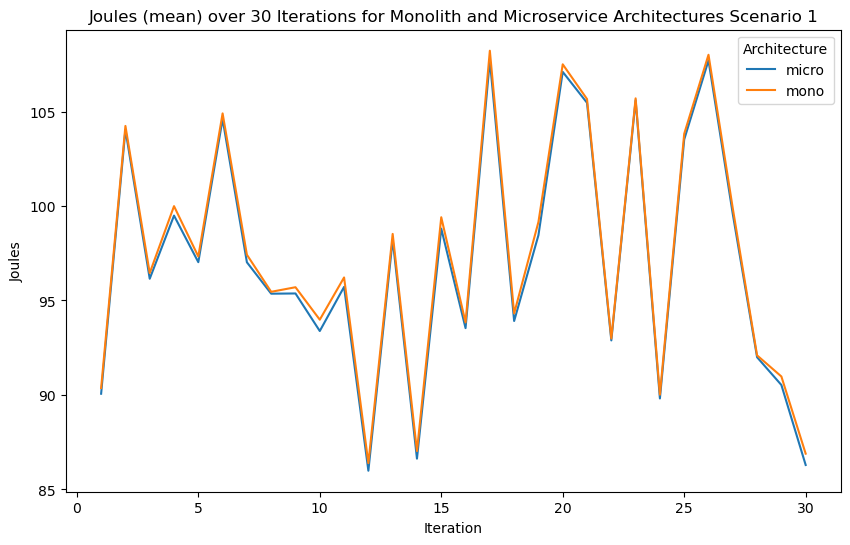

In [501]:
scenario_1 = pd.read_csv('sc-1.csv')
# Create a line plot with separate lines for 'micro' and 'mono'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteration', y='Joules', hue='Architecture', data=scenario_1)
plt.title(f'Joules (mean) over 30 Iterations for Monolith and Microservice Architectures Scenario 1')

# Show the plot
plt.show()

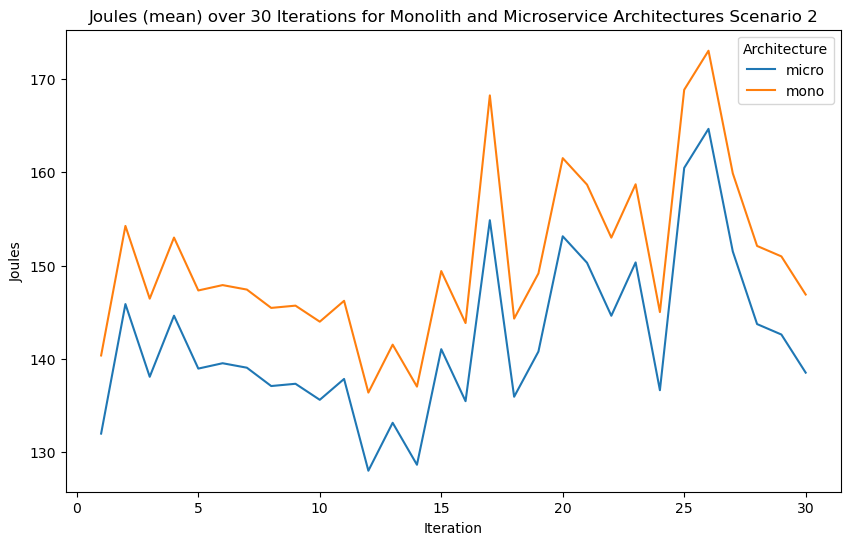

In [502]:
scenario_2 = pd.read_csv('sc-2.csv')
# Create a line plot with separate lines for 'micro' and 'mono'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteration', y='Joules', hue='Architecture', data=scenario_2)
plt.title(f'Joules (mean) over 30 Iterations for Monolith and Microservice Architectures Scenario 2')

# Show the plot
plt.show()

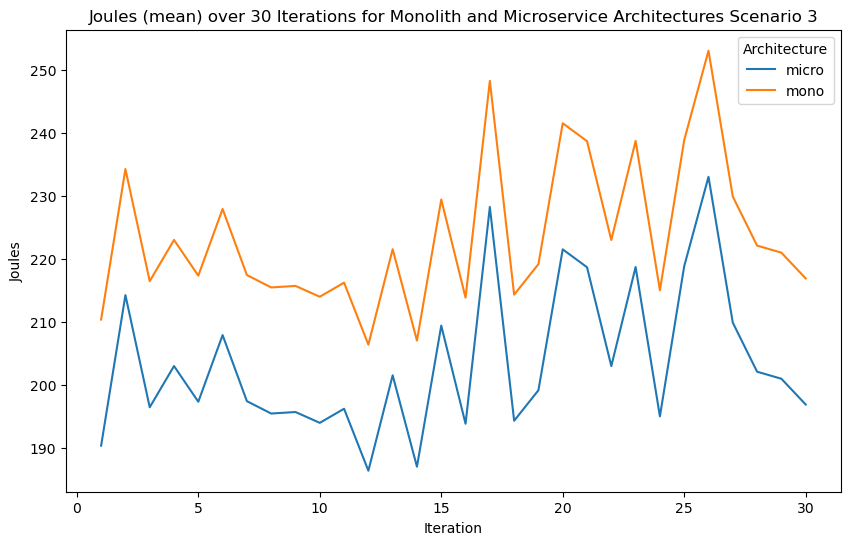

In [503]:
scenario_3 = pd.read_csv('sc-3.csv')
# Create a line plot with separate lines for 'micro' and 'mono'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteration', y='Joules', hue='Architecture', data=scenario_3)
plt.title(f'Joules (mean) over 30 Iterations for Monolith and Microservice Architectures Scenario 3')

# Show the plot
plt.show()

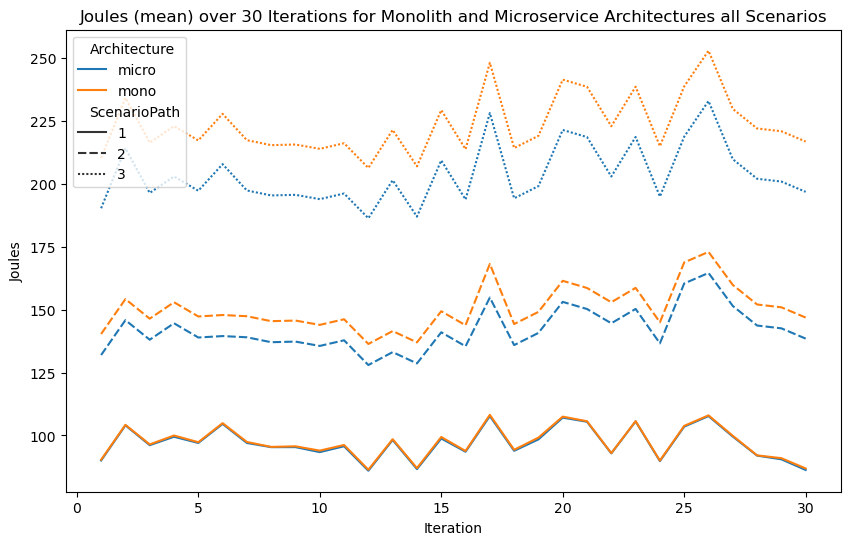

In [504]:
# Concatenate the dataframes for each scenario
# all_scenarios = pd.concat([scenario_1, scenario_2, scenario_3])
all_scenarios = pd.read_csv('pc_all_scenarios_2.csv')
# Create a line plot with separate lines for each scenario and architecture
plt.figure(figsize=(10, 6))
sns.lineplot(x='Iteration', y='Joules', hue='Architecture', style='ScenarioPath', data=all_scenarios)
plt.title(f'Joules (mean) over 30 Iterations for Monolith and Microservice Architectures all Scenarios')

# Show the plot
plt.show()

# export as a csv 
all_scenarios.to_csv('all_scenarios.csv', index=False)

In [497]:
print(all_scenarios.columns)

Index(['Iteration', 'Architecture', 'ScenarioPath', 'Joules', 'refined'], dtype='object')


In [505]:
# Initialize an empty DataFrame to store the final results
final_df = pd.DataFrame()

# Loop over each unique scenario
for scenario in all_scenarios['ScenarioPath'].unique():
    # Filter for the current scenario
    scenario_data = all_scenarios[all_scenarios['ScenarioPath'] == scenario]
    
    # Split the data into two DataFrames, one for 'micro' and one for 'mono'
    micro_data = scenario_data[scenario_data['Architecture'] == 'micro']
    mono_data = scenario_data[scenario_data['Architecture'] == 'mono']
    
    # Filter for iterations 10, 20, 30
    filtered_micro = micro_data[micro_data['Iteration'].isin([10, 20, 30])]
    filtered_mono = mono_data[mono_data['Iteration'].isin([10, 20, 30])]
    
    # Calculate the min, max, and average 'Joules' for 'micro' and 'mono'
    min_micro = micro_data['Joules'].min()
    max_micro = micro_data['Joules'].max()
    average_micro = micro_data['Joules'].mean()

    min_mono = mono_data['Joules'].min()
    max_mono = mono_data['Joules'].max()
    average_mono = mono_data['Joules'].mean()
    
    # Append the min, max, and average 'Joules' as new rows to the filtered DataFrames
    min_row_micro = pd.Series({'Iteration': 'Min', 'Joules': min_micro, 'ScenarioPath': scenario, 'Architecture': 'micro'})
    max_row_micro = pd.Series({'Iteration': 'Max', 'Joules': max_micro, 'ScenarioPath': scenario, 'Architecture': 'micro'})
    average_row_micro = pd.Series({'Iteration': 'Average', 'Joules': average_micro, 'ScenarioPath': scenario, 'Architecture': 'micro'})
    filtered_micro = filtered_micro.append([min_row_micro, max_row_micro, average_row_micro], ignore_index=True)

    min_row_mono = pd.Series({'Iteration': 'Min', 'Joules': min_mono, 'ScenarioPath': scenario, 'Architecture': 'mono'})
    max_row_mono = pd.Series({'Iteration': 'Max', 'Joules': max_mono, 'ScenarioPath': scenario, 'Architecture': 'mono'})
    average_row_mono = pd.Series({'Iteration': 'Average', 'Joules': average_mono, 'ScenarioPath': scenario, 'Architecture': 'mono'})
    filtered_mono = filtered_mono.append([min_row_mono, max_row_mono, average_row_mono], ignore_index=True)
    
    # Append the filtered DataFrames for 'micro' and 'mono' to the final DataFrame
    final_df = final_df.append([filtered_micro, filtered_mono], ignore_index=True)

# Export to csv
final_df.to_csv('output.csv', index=False)

/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_94262/2348003767.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_micro = filtered_micro.append([min_row_micro, max_row_micro, average_row_micro], ignore_index=True)
/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_94262/2348003767.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_mono = filtered_mono.append([min_row_mono, max_row_mono, average_row_mono], ignore_index=True)
/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_94262/2348003767.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append([filtered_micro, filtered_mono], ignore_index=True)
/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipyke

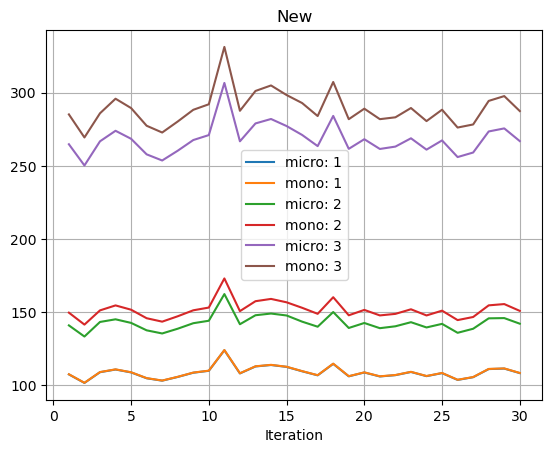

In [491]:
grouped = new_data.groupby('ScenarioPath')

# Create a new figure
fig, ax = plt.subplots()

# For each group, plot a graph on the same figure
for name, group in grouped:
    micro_group = group[group['Architecture'].str.contains('micro')]
    mono_group = group[group['Architecture'].str.contains('mono')]
    
    if not micro_group.empty:
        micro_group.plot(x='Iteration', y='Joules', ax=ax, label=f'micro: {name}')
    if not mono_group.empty:
        mono_group.plot(x='Iteration', y='Joules', ax=ax, label=f'mono: {name}')

# Add a legend, grid and show the plot
ax.legend()
ax.grid(True)
# add a title to the graph
plt.title('New')
plt.show()